<div>
<img src="./images/NCI_Australia_logo.png" width="300" align="left"/>
</div>



# Using GSKY's User-defined Band Math in Python
### Requesting user-defined band math through NCI's GSKY Data Server
NCI's GSKY Data Server supports user-defined band math as an extension to the Open Geospatial Consortium (OGC) Web Map Service (WMS), which is a standard protocol for serving geospatial data as images (e.g., PNG).   


**The following libraries will need to be imported for this example:** 

In [96]:
from owslib.wms import WebMapService
from urllib.parse import urlencode
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

**To start, we will need the base GSKY server URL:**

In [97]:
gsky_url = 'https://gsky.nci.org.au/ows/beta-dea'

**Using OWSLib, we can begin by inspecting the service metadata:**

In [98]:
wms = WebMapService(gsky_url, version='1.3.0')

**To find out the data layers with user-defined band math enabled:**

In [99]:
ns = {'wms': 'http://www.opengis.net/wms', 
      'dea': 'http://dea.ga.gov.au/namespaces/wms_extensions'}

for ext in wms._capabilities.findall('wms:Capability/dea:SupportedExtension', ns):
    if ext.find('dea:Extension', ns).text != 'user_band_math':
        continue
    layer = ext.find('dea:Layer', ns)
    bands = [b.text.strip() for b in ext.findall("dea:ExtensionProperty[@name='available_bands']", ns)]
    print('Layer: %s\nBands: %s\n' % (layer.text, bands))

Layer: landsat5_nbar_16day
Bands: ['nbar_blue', 'nbar_green', 'nbar_red', 'nbar_nir', 'nbar_swir_1', 'nbar_swir_2']

Layer: landsat5_nbar_daily
Bands: ['nbar_blue', 'nbar_green', 'nbar_red', 'nbar_nir', 'nbar_swir_1', 'nbar_swir_2']

Layer: landsat5_nbart_16day
Bands: ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']

Layer: landsat5_nbart_daily
Bands: ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']

Layer: landsat7_nbar_16day
Bands: ['nbar_blue', 'nbar_green', 'nbar_red', 'nbar_nir', 'nbar_swir_1', 'nbar_swir_2']

Layer: landsat7_nbar_daily
Bands: ['nbar_blue', 'nbar_green', 'nbar_red', 'nbar_nir', 'nbar_swir_1', 'nbar_swir_2']

Layer: landsat7_nbart_16day
Bands: ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']

Layer: landsat7_nbart_daily
Bands: ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']

Layer: landsat8_nbar_16day
Bands: ['

**To construct user-defined band math request:**

User-defined band math requires three parameters:

* `code`: this is the math operation over the supported bands for the layer in question. 

* `colorscalerange`: this is to rescale the raw output into the range of 0 and 255 to form a valid image. The resulting pixel value = (v_raw - colorscalerange_min) / (colorscalerange_min + colorscalerange_max).

* `colorscheme`: this is the colour ramp to render the resulting image. The list of the available colour ramps can be found here: https://matplotlib.org/stable/gallery/color/colormap_reference.html

The following example demonstrates calculating NDVI for 16-day Landsat 8 NBART using user-defined band math:

In [104]:
ndvi = '(nbart_nir-nbart_red)/(nbart_nir+nbart_red)'

output = wms.getmap(layers=["landsat8_nbart_16day"],
                        code=ndvi,
                        colorscalerange='-1,1',
                        colorscheme='rainbow',
                        srs='EPSG:4326',
                        bbox=(148.75, -35.93, 149.4, -35.13),
                        size=(512, 512), 
                        format='image/png',
                        time='2013-04-07T00:00:00.000Z'
                        )

**To view the above constructed URL:**

In [105]:
print(output.geturl())

http://gsky.nci.org.au/ows/beta-dea?SERVICE=WMS&service=WMS&version=1.3.0&request=GetMap&layers=landsat8_nbart_16day&styles=&width=512&height=512&crs=EPSG:4326&bbox=-35.93,148.75,-35.13,149.4&format=image/png&transparent=FALSE&bgcolor=0xFFFFFF&exceptions=XML&time=2013-04-07T00:00:00.000Z&code=(nbart_nir-nbart_red)/(nbart_nir+nbart_red)&colorscalerange=-1,1&colorscheme=rainbow


**Lastly, we need to write the GetMap result to a file:**

In [106]:
pngfile = './output/gsky_user_defined_band_math.png'
with open(pngfile, 'wb') as out:
    out.write(output.read())

**And if we'd like to confirm the result:**

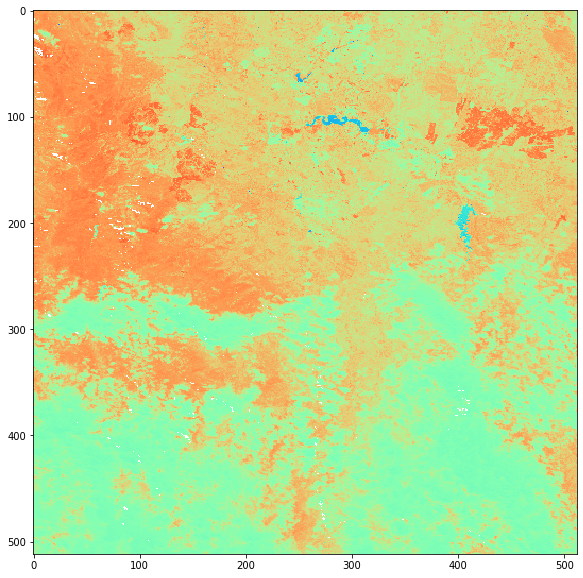

In [107]:
im = Image.open(pngfile)
plt.figure(figsize=(10, 10))
plt.imshow(im)

<br>
<br>
<br>


--------
**For more information on the OGC WMS standard specifications and the Python OWSLib package:** <br/>
http://www.opengeospatial.org/standards/wms <br/>
https://geopython.github.io/OWSLib/#wms <br/>
